In [1]:
# %matplolib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl

In [2]:
Xmin, Xmax, Npoints = 0.,40.,100

h = (Xmax-Xmin)/(Npoints-1)
print(h)

x = np.linspace(Xmin,Xmax,Npoints)
y = np.linspace(Xmin,Xmax,Npoints)

0.40404040404040403


In [3]:
# Definimos campo

T = np.zeros((Npoints,Npoints))
print(T)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
# Definir funciones en la frontera

def h1(y):
    return 75.
def h2(y):
    return 50.
def h3(x):
    return 100.
def h4(x):
    return 0.

In [5]:
for i in range(len(x)):
    T[i,0] = h3(x[i])
    T[i,-1] = h4(x[i])
    
for j in range(len(y)):
    T[0,j] = h1(y[i])
    T[-1,j] = h2(y[i])

print(T)

[[ 75.  75.  75. ...  75.  75.  75.]
 [100.   0.   0. ...   0.   0.   0.]
 [100.   0.   0. ...   0.   0.   0.]
 ...
 [100.   0.   0. ...   0.   0.   0.]
 [100.   0.   0. ...   0.   0.   0.]
 [ 50.  50.  50. ...  50.  50.  50.]]


In [6]:
# Vamos 

def GetGausSeidel(Nit=3):
    
    for it in range(Nit):
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                T[i,j] = 0.25*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]) 

In [7]:
#GetGausSeidel()

In [8]:
print(T)

[[ 75.  75.  75. ...  75.  75.  75.]
 [100.   0.   0. ...   0.   0.   0.]
 [100.   0.   0. ...   0.   0.   0.]
 ...
 [100.   0.   0. ...   0.   0.   0.]
 [100.   0.   0. ...   0.   0.   0.]
 [ 50.  50.  50. ...  50.  50.  50.]]


In [9]:
def GetRelaxation(Nit = 600, omega = 1.3, tolerancia = 1e-2):
    
    for it in range(Nit):
        
        dmax = 0.
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]) 
                r = omega*(tmp - T[i,j])
                T[i,j] += r
                
                if(np.abs(r) > dmax):
                    dmax = r
                    
        print(dmax)
        
        if(dmax < tolerancia):
            print(it)
            break

In [10]:
GetRelaxation()

64.39814814814815
21.17979246814322
11.405930303671536
7.331125999009196
5.527925212188242
4.658244371196036
3.903292275887866
3.405939874382079
3.024591453403913
2.6988163253505153
2.457766019675583
2.244753576084496
2.072842707973329
1.9391856642241672
1.8159696057961867
1.7025815908261948
1.6035025393976603
1.519562828049034
1.4456321906454244
1.3760555568111705
1.3107539913663473
1.2535769040741365
1.2004188805695506
1.1545111448170637
1.1106809374078495
1.0688755978304378
1.0309899732895431
0.995395212417369
0.9614901198393433
0.9318939896019188
0.9033650779327026
0.8758849916733809
0.8508252936406713
0.8268770764624293
0.8037492675472059
0.78180328214589
0.7620397440079302
0.7428607112340239
0.7246103651463436
0.7076271894871304
0.6911134170864095
0.6750626873146374
0.6594672524702503
0.645029621951111
0.6314101048259232
0.6182545974261799
0.6060315958617217
0.594087316459747
0.5824195999146412
0.5710255321405192
0.5599015763439305
0.5492556484793554
0.5394004004815095
0.52995636

0.07718905709787763
0.07703793387833216
0.07688979342872884
0.0767441071788614
0.0765984934639981
0.07645295516136166
0.07630749510757795
0.07616211609902238
0.07601682089234636
0.0758716122049254
0.0757268911424621
0.07558315127246296
0.0754394916508666
0.07529591497983966
0.07515242392310882
0.07500902110654266
0.0748657091184242
0.07472249050999125
0.074579367795792
0.0744363434541377
0.07429341992747211
0.0741505996228149
0.0740078849121403
0.07386527813280211
0.07372278158787537
0.07358275183621359
0.0734449118827584
0.07330714807373298
0.07316946290832896
0.07303185885080339
0.07289433833092218
0.07275690374431108
0.07261955745283899
0.07248230178502908
0.07234513903635431
0.07220807146963466
0.07207110131548973
0.07193423077251425
0.07179746200781381
0.07166079715727279
0.07152423832584986
0.07138778758807689
0.0712514469882251
0.07111521854073004
0.07097910423060726
0.07084310601358156
0.07070722581653968
0.0705714655379552
0.07043582704792542
0.07030176041969725
0.070170108530

In [11]:
print(T)

[[ 75.          75.          75.         ...  75.          75.
   75.        ]
 [100.          87.44862944  82.45607928 ...  52.28711789  37.48159515
    0.        ]
 [100.          92.33871352  87.29506721 ...  37.42648026  22.63931247
    0.        ]
 ...
 [100.          84.80005442  74.83506751 ...  24.95967643  15.09722459
    0.        ]
 [100.          74.95872642  65.03493206 ...  34.86248817  24.98993726
    0.        ]
 [ 50.          50.          50.         ...  50.          50.
   50.        ]]


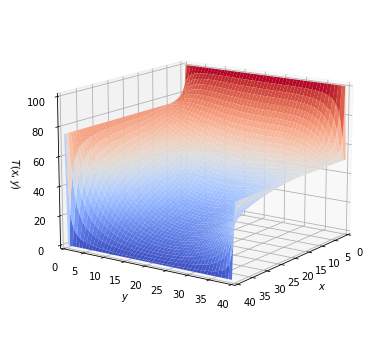

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection = '3d', elev = 14, azim = 35)

ax.set_xlim3d(0, 40)
ax.set_ylim3d(0, 40)

ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)
ax.set_zlabel('$T(x,y)$', fontsize=10)

X,Y = np.meshgrid(x,y)
ax.plot_surface(X, Y, T, cmap=cm.coolwarm,linewidth=0)
plt.savefig('TemperatureMap.png')